# Customer Churn Prediction:

Develop a model to predict customer churn for a subscriptionbased service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.

# Importing necessary libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Loading the dataset

In [105]:
data = pd.read_csv("Churn_Modelling.csv")

# Display basic information about the dataset

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Dropping unnecessary columns

In [107]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Converting categorical values to numerical using one-hot encoding

In [108]:
data = pd.get_dummies(data, drop_first=True)
data = data.astype(int)

# Data visualization

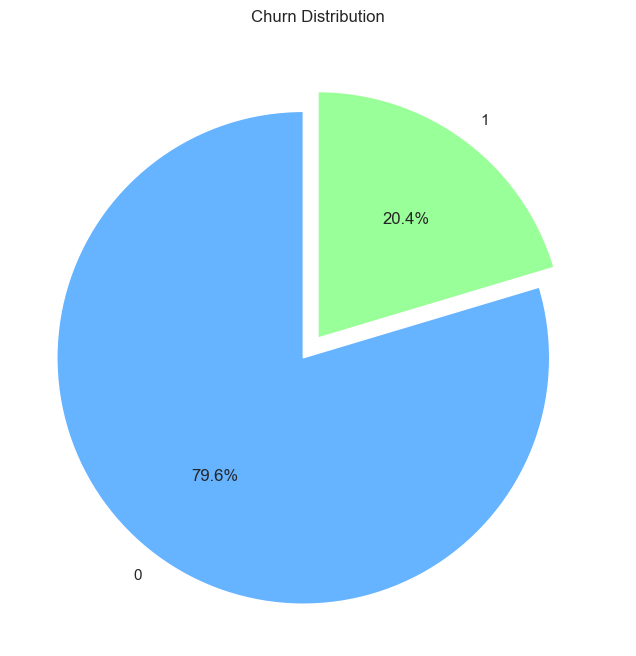

In [109]:
plt.figure(figsize=(8, 8))
churn_distribution = data['Exited'].value_counts()
labels = churn_distribution.index
colors = ['#66b3ff','#99ff99']
explode = (0.1, 0)  # explode the 1st slice (churned)

plt.pie(churn_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Churn Distribution')
plt.show()

# Separating features and target variable

In [110]:
X = data.drop('Exited', axis=1)
y = data['Exited']

# Splitting the dataset into training and testing sets

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


# Scaling the features

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [113]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
y_pred_lr = LR.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Support Vector Machine (SVM)

In [114]:
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Random Forest

In [115]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Decision Tree Classifier

In [116]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# KNeighbors Classifier

In [117]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Gradient Boosting Classifier

In [118]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)
y_pred_gbc = gbc.predict(X_test_scaled)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

# Model Performance Summary

In [119]:
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Decision Tree', 'KNN', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_dt, accuracy_knn, accuracy_gbc],
    'Precision': [precision_lr, precision_svm, precision_rf, precision_dt, precision_knn, precision_gbc],
    'Recall': [recall_lr, recall_svm, recall_rf, recall_dt, recall_knn, recall_gbc],
    'F1 Score': [f1_lr, f1_svm, f1_rf, f1_dt, f1_knn, f1_gbc]
})

performance_summary

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.809,0.500000,0.193717,0.279245
1,Support Vector Machine,0.865,0.797872,0.392670,0.526316
2,Random Forest,0.863,0.728814,0.450262,0.556634
3,Decision Tree,0.806,0.492537,0.518325,0.505102
4,KNN,0.840,0.618321,0.424084,0.503106
5,Gradient Boosting,0.867,0.741667,0.465969,0.572347


# Melt the performance summary for better visualization

In [120]:
melted_summary = pd.melt(performance_summary, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plotting

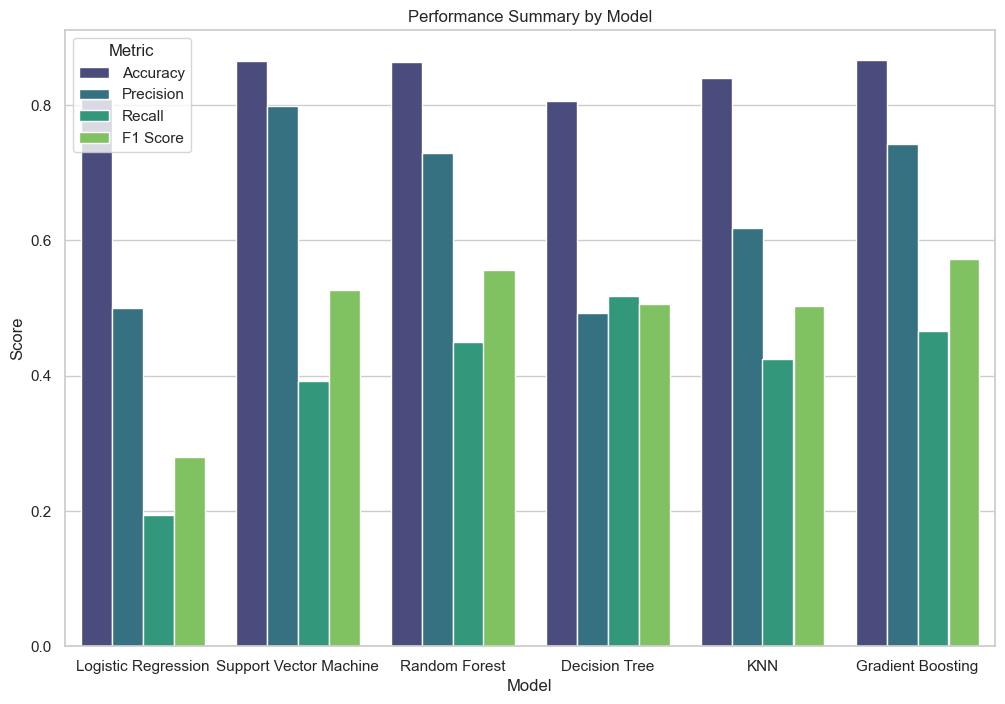

In [121]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_summary, palette='viridis')
plt.title('Performance Summary by Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()